# WeatherPy
----

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

from api_keys import weather_api_key 
from citipy import citipy

In [3]:
output_data_file = "output_data/cities.csv"

In [4]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"

In [5]:
#city_data = pd.read_csv("../output_data/cities.csv")
#city_data.head()

## Generate Cities List

In [6]:
#setup lists for loop
coordinates = []
city_list = []

#find 500+ cities
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
coordinates = zip(lats, lngs)

#loop through citipy
for coordinates in coordinates:
    rand_city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name

    if rand_city not in city_list:
        city_list.append(rand_city)

In [7]:
rand_city

'aksu'

In [8]:
len(city_list)

561

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#city_data.columns

In [10]:
city_name= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [12]:
set_count = 1
record = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

print('Beginning Data Retrieval')
print('------------------------')

for city in city_list:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url).json()
    
    if record < 50:
        record += 1
    else:
        set_count += 1
        record = 1

    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | ust-maya
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | henties bay
Processing Record 6 of Set 1 | high level
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | xining
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | madang
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | paamiut
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | alban

Processing Record 38 of Set 4 | nouadhibou
Processing Record 39 of Set 4 | solnechnyy
Processing Record 40 of Set 4 | pitimbu
Processing Record 41 of Set 4 | ketchikan
Processing Record 42 of Set 4 | igarapava
Processing Record 43 of Set 4 | huesca
Processing Record 44 of Set 4 | zachagansk
City not found. Skipping...
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | alta floresta
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | altoona
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | quatre cocos
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | poiana blenchii
Processing Record 5 of Set 5 | olinda
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | vaini
Processing Record 8 of Set 5 | carutapera
Processing Record 9 of Set 5 | dalaba
Processing Record 10 of Set 5 | fayaoue
Proc

Processing Record 24 of Set 8 | meulaboh
Processing Record 25 of Set 8 | upernavik
Processing Record 26 of Set 8 | jodhpur
Processing Record 27 of Set 8 | prince rupert
Processing Record 28 of Set 8 | lumeje
Processing Record 29 of Set 8 | agadez
Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | aljezur
Processing Record 32 of Set 8 | xuanzhou
Processing Record 33 of Set 8 | waipawa
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | sur
Processing Record 36 of Set 8 | kulhudhuffushi
Processing Record 37 of Set 8 | aksay
Processing Record 38 of Set 8 | lima
Processing Record 39 of Set 8 | shunyi
Processing Record 40 of Set 8 | jacqueville
Processing Record 41 of Set 8 | tiznit
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | sochi
Processing Record 44 of Set 8 | north atlanta
Processing Record 45 of Set 8 | la plata
Processing Record 46 of Set 8 | balykshi
Processing Record 47 of Set 8 | dunkir

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame({"City": city_name, "Country": country, "Date": date,
                          "Latitude": lat, "Longitude": lng, "Cloudiness": cloudiness,
                          "Humidity": humidity, "Max Temperature": max_temp, "Wind Speed": wind_speed})

weather_df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Arraial do Cabo,BR,1738906615,-22.9661,-42.0278,98,93,73.90,18.03
1,Ust-Maya,RU,1738906615,60.4167,134.5333,100,91,-16.92,4.85
2,Bethel,US,1738906616,41.3712,-73.4140,100,90,36.59,5.01
3,Henties Bay,NA,1738906616,-22.1160,14.2845,77,84,66.43,4.07
4,High Level,CA,1738906616,58.5169,-117.1360,100,77,-3.89,0.00
...,...,...,...,...,...,...,...,...,...
672,Khāsh,IR,1738907309,28.2211,61.2158,95,25,58.57,18.28
673,Benguela,AO,1738907309,-12.5763,13.4055,91,79,78.51,3.47
674,Saint-Leu,RE,1738907309,-21.1500,55.2833,28,89,86.95,6.89
675,Buritis,BR,1738907309,-15.6178,-46.4233,63,85,67.71,0.85


In [14]:
weather_df['City'].value_counts()

Rome           3
Mataura        2
Nkhotakota     2
Jiuquan        2
Henties Bay    2
              ..
Mezen'         1
Mersing        1
Omsukchan      1
Kosh-Agach     1
Khāsh          1
Name: City, Length: 510, dtype: int64

In [15]:
weather_df = weather_df.drop_duplicates(['City'])

In [16]:
weather_df.count()

City               510
Country            510
Date               510
Latitude           510
Longitude          510
Cloudiness         510
Humidity           510
Max Temperature    510
Wind Speed         510
dtype: int64

In [17]:
weather_df.describe()

,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
count,5.100000e+02,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,1.738907e+09,20.930423,21.169674,60.366667,72.178431,51.033922,9.081490
std,3.130413e+02,33.271312,88.586412,38.766908,22.726734,30.689522,6.591291
min,1.738906e+09,-54.800000,-175.200000,0.000000,5.000000,-38.510000,0.000000
25%,1.738907e+09,-7.196100,-55.482900,20.000000,62.000000,29.215000,4.000000
50%,1.738907e+09,26.197250,27.153850,75.000000,77.000000,59.710000,7.470000
75%,1.738907e+09,48.762625,97.174225,99.000000,91.000000,75.277500,12.822500
max,1.738907e+09,78.218600,179.316700,100.000000,100.000000,106.050000,56.660000


In [18]:
weather_df.to_csv("Outputs/weather_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df['Humidity'] > 100].index
humidity_df

Int64Index([], dtype='int64')

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humid_index_data = weather_df.drop(humidity_df, inplace=False)
humid_index_data.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Arraial do Cabo,BR,1738906615,-22.9661,-42.0278,98,93,73.90,18.03
1,Ust-Maya,RU,1738906615,60.4167,134.5333,100,91,-16.92,4.85
2,Bethel,US,1738906616,41.3712,-73.4140,100,90,36.59,5.01
3,Henties Bay,NA,1738906616,-22.1160,14.2845,77,84,66.43,4.07
4,High Level,CA,1738906616,58.5169,-117.1360,100,77,-3.89,0.00


In [21]:
# Extract relevant fields from the data frame
lats = humid_index_data["Latitude"]
max_temps = humid_index_data["Max Temperature"]
humidity = humid_index_data["Humidity"]
cloudiness = humid_index_data["Cloudiness"]
wind_speed = humid_index_data["Wind Speed"]

# Export the City_Data into a csv
humid_index_data.to_csv("../output_data/cities.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

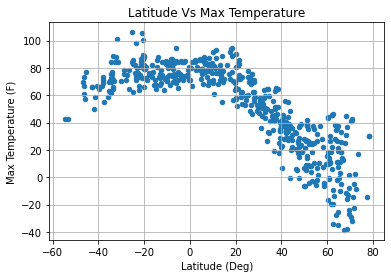

In [22]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Max Temperature')
plt.title('Latitude Vs Max Temperature')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Max Temperature (F)')
plt.grid()

## Latitude vs. Humidity Plot

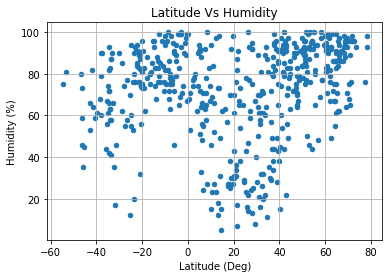

In [23]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Humidity')
plt.title('Latitude Vs Humidity')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity (%)')
plt.grid()

## Latitude vs. Cloudiness Plot

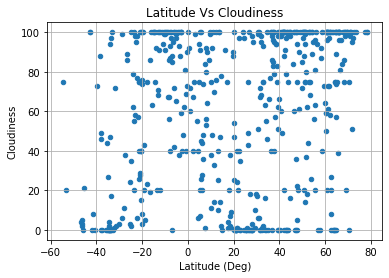

In [24]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Cloudiness')
plt.title('Latitude Vs Cloudiness')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

## Linear Regression

In [25]:
#create hemisphere dataframes

north_df = weather_df.loc[weather_df['Latitude']>=0]
south_df = weather_df.loc[weather_df['Latitude']<0]

In [26]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, r, p, stderr) = linregress(x_val, y_val)

    reg_val = x_val * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {r**2}")

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7443275520875637


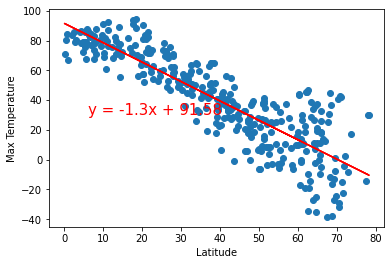

In [27]:
x_val = north_df['Latitude']
y_val = north_df['Max Temperature']

plot_linear_regression(x_val, y_val, 'Max Temperature', (6,30)) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.13627103239558533


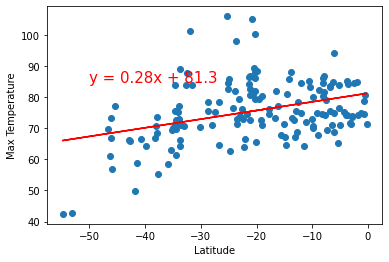

In [28]:
x_val = south_df['Latitude']
y_val = south_df['Max Temperature']

plot_linear_regression(x_val, y_val, 'Max Temperature', (-50,85)) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19150499579803168


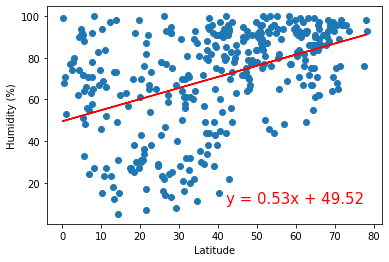

In [29]:
x_val = north_df['Latitude']
y_val = north_df['Humidity']

plot_linear_regression(x_val, y_val, 'Humidity (%)', (42,10)) 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1947702567974626


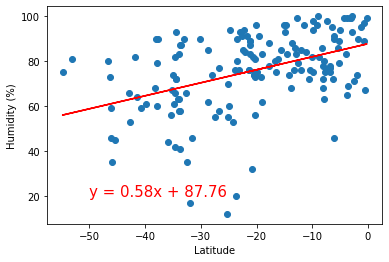

In [30]:
x_val = south_df['Latitude']
y_val = south_df['Humidity']

plot_linear_regression(x_val, y_val, 'Humidity (%)', (-50,20)) 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08627827498940692


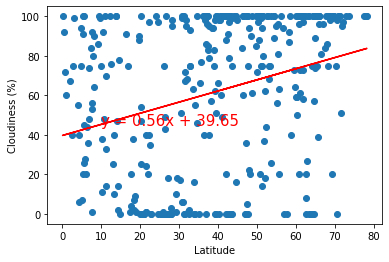

In [31]:
x_val = north_df['Latitude']
y_val = north_df['Cloudiness']

plot_linear_regression(x_val, y_val, 'Cloudiness (%)', (10,45)) 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29149875664739033


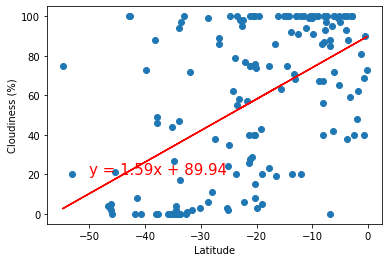

In [32]:
x_val = south_df['Latitude']
y_val = south_df['Cloudiness']

plot_linear_regression(x_val, y_val, 'Cloudiness (%)', (-50,20)) 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014234256734481775


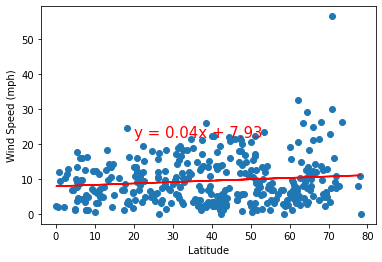

In [33]:
x_val = north_df['Latitude']
y_val = north_df['Wind Speed']

plot_linear_regression(x_val, y_val, 'Wind Speed (mph)', (20,22)) 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08490589763782222


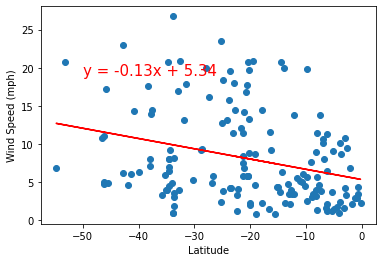

In [34]:
x_val = south_df['Latitude']
y_val = south_df['Wind Speed']

plot_linear_regression(x_val, y_val, 'Wind Speed (mph)', (-50,19)) 